## Use the Econ.csv in the Analysis directory.  The script below can be used to create the df, but S&P weekends, holidays wont align to economic data.  Preprocessing done external to this script.

In [ ]:
# import pandas_datareader as pdr
# import pandas as pd
# import datetime
# import yfinance as yf
# f1 = yf.download('SPY', start='1993-02-01')

# start_date = datetime.datetime(1993, 2, 1)
# end_date = datetime.datetime.now()

# indicators = {

#     "Unemployment Rate": "UNRATE",
#     "Real GDP": "GDPC1",
#     "Feds Funds":"FEDFUNDS",
#     "Industrial Production": "INDPRO",
#     "Retail Sales": "RSXFS",
#     "Leading Index": "USSLIND",
#     "Housing Starts": "HOUST",
#     "Building Permits": "PERMIT",
#     "Consumer Sentiment": "UMCSENT",
#     "Corporate Profits": "CP",
#     "S&P 500": "SP500",
#     "Inflation": "FPCPITOTLZGUSA",
#     "10-2 Year Treasury Spread": "T10Y2Y",
#     "Existing Home Sales": "EXHOSLUSM495S"
# }

# dataframes = {}

# for name, code in indicators.items():
#     dataframes[name] = pdr.get_data_fred(code, start_date, end_date)

# df = pd.concat(dataframes, axis=1)

# df2 = df.asfreq('BMS')
# M = f1.asfreq('BMS')
# f2= f1.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)
# data = pd.concat([f2, df2], axis=1) <- Cant concat due to weekend/holidays data in the SP500 ends up offesting every 4-5 months


In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('Econ.csv')
df

,Date,Unemployment Rate,Feds Funds,Industrial Production,Leading Index,Housing Starts,Building Permits,Consumer Sentiment,Close
0,2/1/1993,7.1,3.03,64.9290,2.10,1210,1148,86.6,44.3
1,3/1/1993,7.0,3.07,64.8720,1.61,1083,1056,85.9,44.3
2,4/1/1993,7.1,2.96,65.0611,1.64,1258,1104,85.6,45.0
3,5/1/1993,7.1,3.00,64.8104,1.45,1260,1112,80.3,44.3
4,6/1/1993,7.0,3.04,64.9553,1.60,1280,1130,81.5,45.7
...,...,...,...,...,...,...,...,...,...
320,10/1/2019,3.6,1.83,101.6022,1.41,1332,1538,95.5,293.2
321,11/1/2019,3.6,1.55,102.1480,1.38,1346,1522,96.8,306.1
322,12/1/2019,3.6,1.55,101.8840,1.48,1551,1461,99.3,311.6
323,1/1/2020,3.5,1.55,101.3768,1.57,1572,1500,99.8,317.9


In [16]:
df.isnull().sum()

Date                     0
Unemployment Rate        0
Feds Funds               0
Industrial Production    0
Leading Index            0
Housing Starts           0
Building Permits         0
Consumer Sentiment       0
Close                    0
dtype: int64

In [17]:
df.describe()

,Unemployment Rate,Feds Funds,Industrial Production,Leading Index,Housing Starts,Building Permits,Consumer Sentiment,Close
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,5.733231,2.578523,91.443860,1.291446,1320.956923,1347.258462,88.596923,137.928615
std,1.639972,2.188474,10.473337,0.770152,418.271278,422.676810,12.304628,64.613607
min,3.500000,0.070000,64.810400,-2.650000,478.000000,513.000000,55.300000,44.300000
25%,4.500000,0.200000,87.834400,1.080000,1058.000000,1076.000000,81.500000,98.500000
50%,5.400000,1.980000,93.394400,1.500000,1355.000000,1358.000000,91.200000,126.700000
75%,6.300000,5.020000,99.455800,1.730000,1604.000000,1640.000000,96.800000,158.300000
max,10.000000,6.540000,104.118100,2.400000,2273.000000,2263.000000,112.000000,324.100000


In [18]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

# None of the parameters have been optimized, just a test case. Going to push a model a week. 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:,0:] = sc.transform(X_test[:, 0:])

## Multi linear regression

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[145.51 137.6 ]
 [115.63 114.6 ]
 [162.75 169.3 ]
 [ 30.61  47.  ]
 [144.24 142.5 ]
 [125.42 136.2 ]
 [229.34 223.6 ]
 [ 67.88 100.4 ]
 [ 82.22 110.2 ]
 [121.87 124.1 ]
 [180.44 133.5 ]
 [203.33 188.3 ]
 [238.18 295.7 ]
 [125.41 111.3 ]
 [234.5  293.2 ]
 [ 92.12 120.5 ]
 [111.06 117.4 ]
 [109.87 118.9 ]
 [ 58.35  48.7 ]
 [ 24.13  44.9 ]
 [148.   140.4 ]
 [173.52 143.6 ]
 [ 79.51  76.  ]
 [221.88 210.3 ]
 [136.79 132.2 ]
 [243.57 273.5 ]
 [118.11  88.8 ]
 [100.1   94.1 ]
 [129.37 112.6 ]
 [224.67 191.8 ]
 [158.97 156.1 ]
 [113.07 107.5 ]
 [242.11 265.  ]
 [164.47 151.  ]
 [243.01 267.7 ]
 [165.27 150.4 ]
 [106.79  95.3 ]
 [ 41.86  58.8 ]
 [130.32 131.4 ]
 [157.78 142.4 ]
 [154.57 151.2 ]
 [ 78.12  65.2 ]
 [105.03  90.2 ]
 [158.19 151.8 ]
 [ 75.53  70.6 ]
 [244.43 273.6 ]
 [142.67 140.9 ]
 [244.82 279.3 ]
 [123.46  94.  ]
 [ 47.33  46.  ]
 [138.58 138.  ]
 [141.45 143.9 ]
 [ 25.66  46.5 ]
 [143.54 129.8 ]
 [140.24 133.1 ]
 [235.54 239.8 ]
 [229.78 211.  ]
 [164.17 154.3 ]
 [ 20.23  44.3

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 488.05190643872436
R-squared: 0.8922011097560986


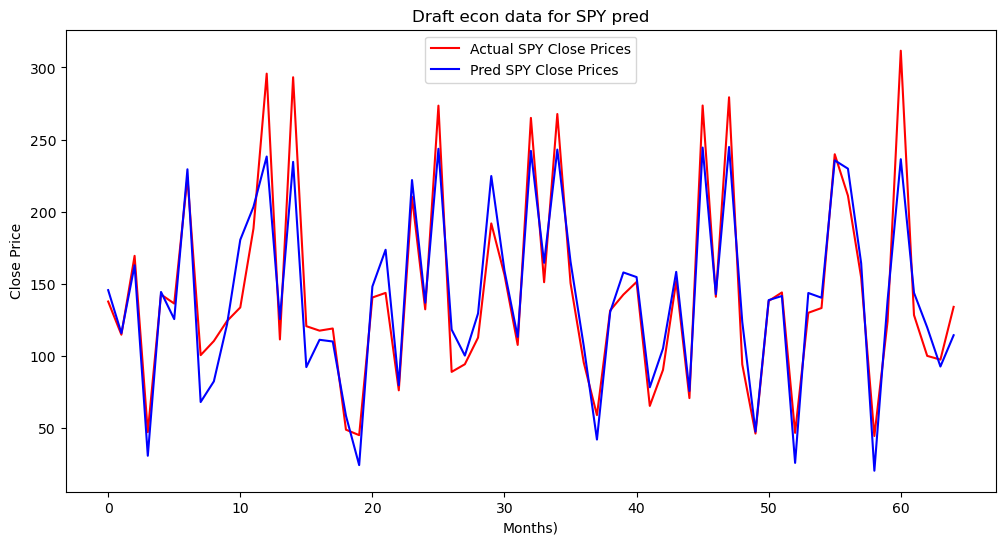

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test, color = 'red', label = 'Actual SPY Close Prices')
plt.plot(y_pred, color = 'blue', label = 'Pred SPY Close Prices')
plt.title('Draft econ data for SPY pred')
plt.xlabel('Months)')
plt.ylabel('Close Price')
plt.legend()
plt.show()
